In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("../data/breast_cancer_2.csv", header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
            'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
df.columns = col_names

In [6]:
df.drop("Id", axis=1, inplace=True)

In [7]:
df.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [9]:
for var in df.columns:
    print(df[var].value_counts())


Clump_thickness
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: count, dtype: int64
Uniformity_Cell_Size
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64
Uniformity_Cell_Shape
1     353
2      59
10     58
3      56
4      44
5      34
7      30
6      30
8      28
9       7
Name: count, dtype: int64
Marginal_Adhesion
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: count, dtype: int64
Single_Epithelial_Cell_Size
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: count, dtype: int64
Bare_Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64
Bland_Chromatin
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
N

In [10]:
df["Bare_Nuclei"] = pd.to_numeric(df["Bare_Nuclei"], errors="coerce")

In [11]:
df.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [12]:
df.isna().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [13]:
df['Bare_Nuclei'].value_counts().sum()

np.int64(683)

In [14]:
df.shape

(699, 10)

In [15]:
df['Bare_Nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [16]:
df['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

In [17]:
df['Class'].value_counts()/np.float64(len(df))

Class
2    0.655222
4    0.344778
Name: count, dtype: float64

In [18]:
print(round(df.describe(),2))

       Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
count           699.00                699.00                 699.00   
mean              4.42                  3.13                   3.21   
std               2.82                  3.05                   2.97   
min               1.00                  1.00                   1.00   
25%               2.00                  1.00                   1.00   
50%               4.00                  1.00                   1.00   
75%               6.00                  5.00                   5.00   
max              10.00                 10.00                  10.00   

       Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
count             699.00                       699.00       683.00   
mean                2.81                         3.22         3.54   
std                 2.86                         2.21         3.64   
min                 1.00                         1.00         1.00   
25%       

<Figure size 3000x2500 with 0 Axes>

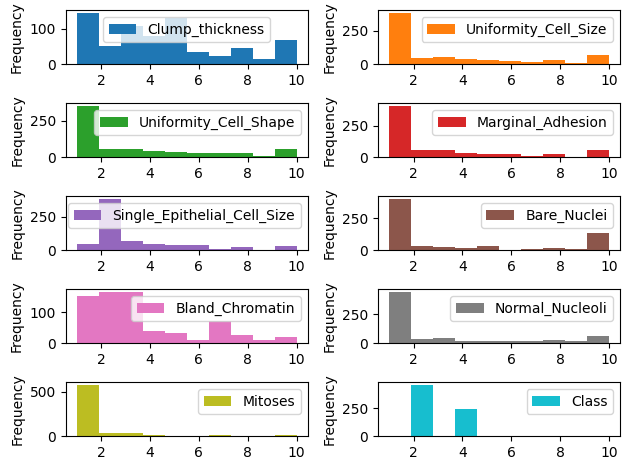

In [19]:
plt.figure(figsize=(30,25))
df.plot(kind="hist", bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [20]:
correlation = df.corr()
correlation['Class'].sort_values(ascending=False)

Class                          1.000000
Bare_Nuclei                    0.822696
Uniformity_Cell_Shape          0.818934
Uniformity_Cell_Size           0.817904
Bland_Chromatin                0.756616
Clump_thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

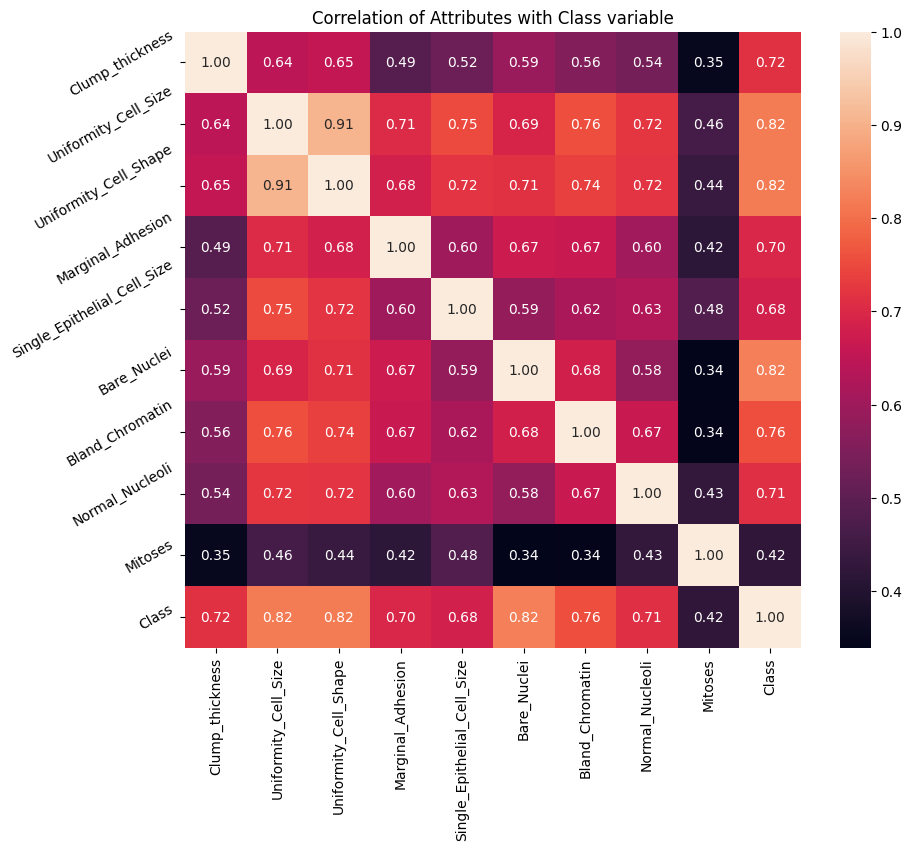

In [21]:
plt.figure(figsize=(10, 8))
plt.title("Correlation of Attributes with Class variable")
a = sns.heatmap(correlation, square=True, annot=True, fmt=".2f", linecolor="white")
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()


In [22]:
X = df.drop(["Class"], axis=1)
y = df["Class"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
X_train

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
293,10,4,4,6,2,10.0,2,3,1
62,9,10,10,1,10,8.0,3,3,1
485,1,1,1,3,1,3.0,1,1,1
422,4,3,3,1,2,1.0,3,3,1
332,5,2,2,2,2,1.0,2,2,1
...,...,...,...,...,...,...,...,...,...
359,10,3,5,4,3,7.0,3,5,3
192,5,1,1,1,2,1.0,2,1,1
629,4,1,1,1,2,1.0,1,1,1
559,5,1,1,1,2,1.0,2,1,1


In [25]:
X_train.shape, X_test.shape

((559, 9), (140, 9))

In [26]:
X_train.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
dtype: object

In [27]:
X_train.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    13
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
dtype: int64

In [28]:
X_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    3
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [29]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

imputer.fit(X_train)  

X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns, index=X_test.index)

In [33]:
cols = X_train.columns

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [37]:
X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [41]:
y_pred = knn.predict(X_test)
y_pred

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2])

In [42]:
knn.predict_proba(X_test)[:,0]

array([1.        , 1.        , 0.33333333, 1.        , 0.        ,
       1.        , 0.33333333, 1.        , 0.        , 0.66666667,
       1.        , 1.        , 0.        , 0.33333333, 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.33333333, 0.        , 1.        , 1.        , 1.        ,
       0.33333333, 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.33333333,
       0.33333333, 0.        , 1.        , 1.        , 0.33333333,
       1.        , 1.        , 0.        , 0.        , 1.     

In [43]:
knn.predict_proba(X_test)[:,1]

array([0.        , 0.        , 0.66666667, 0.        , 1.        ,
       0.        , 0.66666667, 0.        , 1.        , 0.33333333,
       0.        , 0.        , 1.        , 0.66666667, 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       0.66666667, 1.        , 0.        , 0.        , 0.        ,
       0.66666667, 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.66666667,
       0.66666667, 1.        , 0.        , 0.        , 0.66666667,
       0.        , 0.        , 1.        , 1.        , 0.     

In [44]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9643


In [45]:
y_pred_train = knn.predict(X_train)

In [46]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9821


In [47]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9821
Test set score: 0.9643


In [48]:
y_test.value_counts()

Class
2    85
4    55
Name: count, dtype: int64

In [49]:
null_accuracy = (85/(85+55))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6071


In [50]:
knn_7 = KNeighborsClassifier(n_neighbors=7)

knn_7.fit(X_train, y_train)

y_pred_7 = knn_7.predict(X_test)


print('Model accuracy score with k=7 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_7)))

Model accuracy score with k=7 : 0.9714


In [55]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[83  2]
 [ 3 52]]

True Positives(TP) =  83
True Negatives(TN) =  52
False Positives(FP) =  2
False Negatives(FN) =  3


<Axes: >

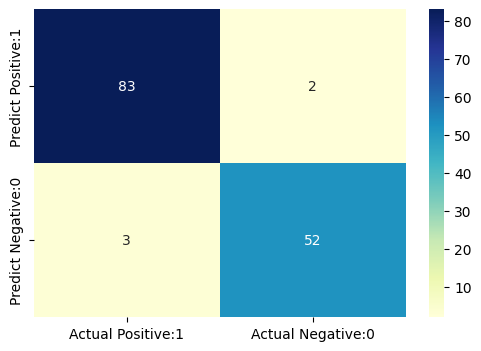

In [56]:
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_7))

              precision    recall  f1-score   support

           2       0.98      0.98      0.98        85
           4       0.96      0.96      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_1, pos_label=4)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Breast Cancer kNN classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()